In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, InputLayer, Rescaling
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [30]:
fpath = r"D:\\Programming\\Project\\dataset_3"
img_size = 224
batch_size =32
train = tf.keras.utils.image_dataset_from_directory(
  fpath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  label_mode ="categorical"
)

Found 1000 files belonging to 20 classes.
Using 800 files for training.


In [31]:
fpath_val = r"D:\\Programming\\Project\\dataset_3"
val = tf.keras.utils.image_dataset_from_directory(
  fpath_val,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  label_mode ="categorical"
)

Found 1000 files belonging to 20 classes.
Using 200 files for validation.


In [32]:
class_names = train.class_names
print(class_names)

['abhay_deol', 'adil_hussain', 'ajay_devgn', 'akshay_kumar', 'akshaye_khanna', 'amitabh_bachchan', 'amjad_khan', 'amol_palekar', 'amole_gupte', 'amrish_puri', 'anil_kapoor', 'annu_kapoor', 'anupam_kher', 'anushka_shetty', 'arshad_warsi', 'aruna_irani', 'ashish_vidyarthi', 'asrani', 'atul_kulkarni', 'ayushmann_khurrana']


In [33]:
Model_URL ='https://kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-classification/versions/2'

In [34]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Layer, Input, Dense, Rescaling
from tensorflow.keras.models import Model

# Define the model URL
Model_URL ='https://kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-classification/versions/2'

class HubLayer(Layer):
    def __init__(self, model_url):
        super(HubLayer, self).__init__()
        self.model = hub.load(model_url)

    def call(self, inputs):
        return self.model(inputs)

# Define the image size
img_size = 224

# Input layer
inputs = Input(shape=(img_size, img_size, 3))

# Rescaling layer
rescaled_inputs = Rescaling(1./255)(inputs)

# Custom Hub layer
hub_layer = HubLayer(Model_URL)(rescaled_inputs)

# Dense layer
outputs = Dense(20, activation="softmax")(hub_layer)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_layer_2 (HubLayer)          │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        20,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040 (78.28 KB)

 Trainable params: 20,040 (78.28 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

In [36]:
model.build((img_size, img_size, 3))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_layer_2 (HubLayer)          │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        20,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040 (78.28 KB)

 Trainable params: 20,040 (78.28 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_name= "model.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)



earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5,
                                                 verbose = 1, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)


In [38]:
history= model.fit(train, epochs=4, validation_data=val, callbacks=[checkpoint,earlystopping, reduce_lr])


Epoch 1/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0883 - loss: 4.3351
Epoch 1: val_loss improved from inf to 3.05545, saving model to model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.0894 - loss: 4.3147 - val_accuracy: 0.2150 - val_loss: 3.0555 - learning_rate: 0.0010
Epoch 2/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3175 - loss: 2.3697
Epoch 2: val_loss improved from 3.05545 to 2.55596, saving model to model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.3184 - loss: 2.3673 - val_accuracy: 0.3250 - val_loss: 2.5560 - learning_rate: 0.0010
Epoch 3/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4596 - loss: 1.7307
Epoch 3: val_loss improved from 2.55596 to 2.31920, saving model to model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.4598 - loss: 1.7311 - val_accuracy: 0.3550 - val_loss: 2.3192 - learning_rate: 0.0010
Epoch 4/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5757 - loss: 1.3984
Epoch 4: val_loss i

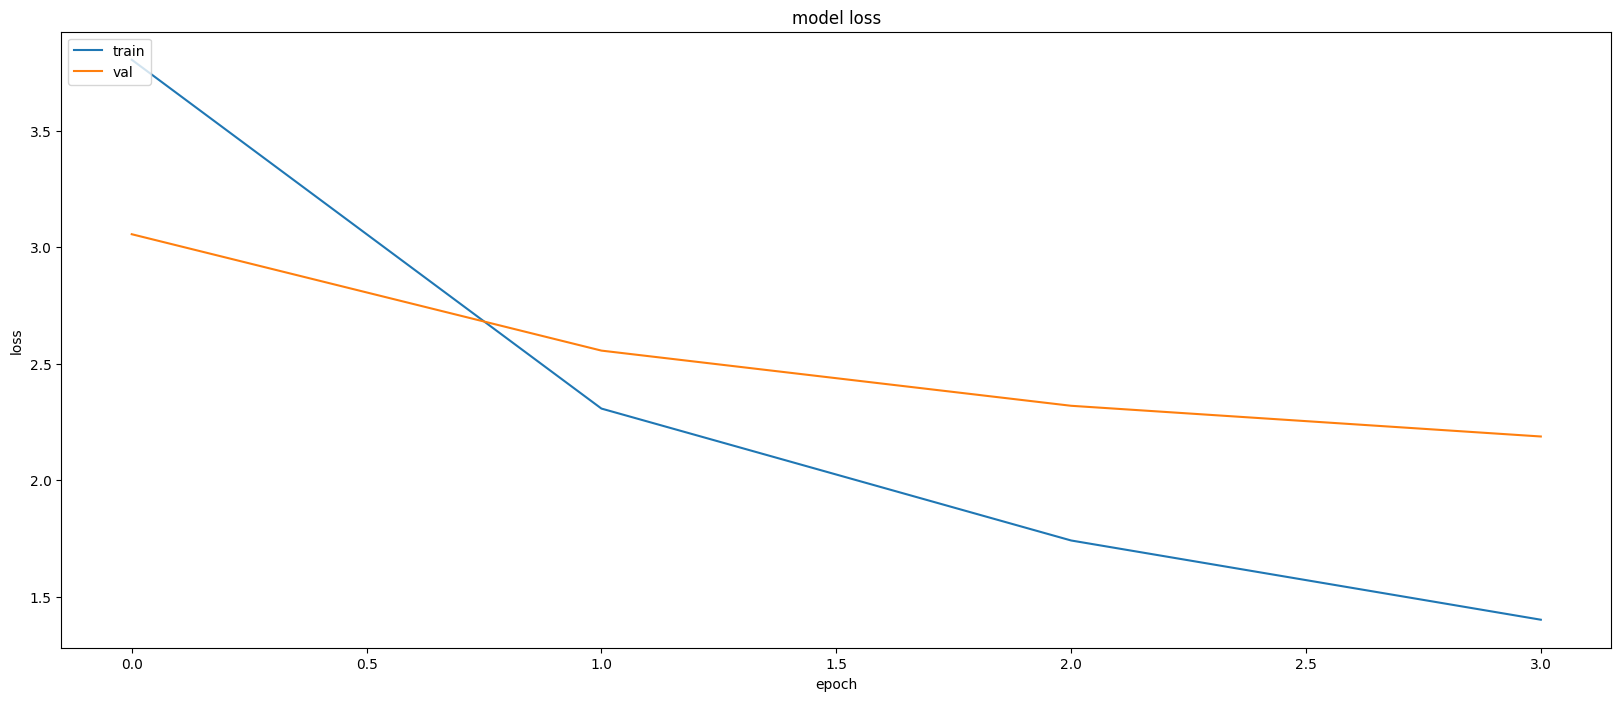

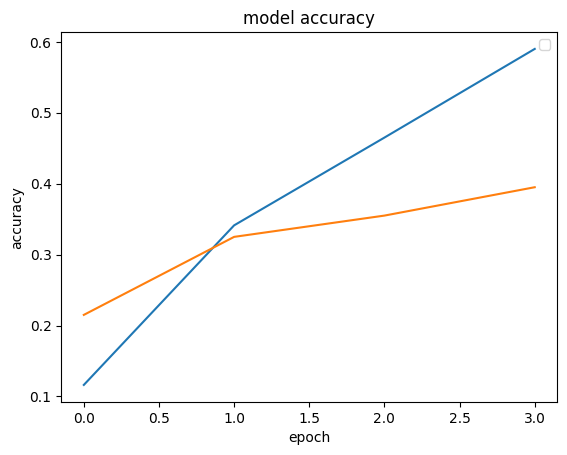

In [39]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [40]:
loss, accuracy = model.evaluate(train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 672ms/step - accuracy: 0.6779 - loss: 1.1097


In [41]:
print(f"Accuracy is: {round(accuracy*100,2)}%")

Accuracy is: 66.62%


In [42]:
def predict_with_probabilities(image_path):
    img_size = 224
    single_image = load_img(image_path, target_size=(img_size, img_size))
    single_image_array = tf.keras.preprocessing.image.img_to_array(single_image)
    test = tf.expand_dims(single_image_array, 0)

    # Get predictions and probabilities
    predictions = model.predict(test)
    top_3_probs = predictions.squeeze().argsort()[-3:][::-1]  # Get top 3 probabilities
    top_3_classes = [class_names[i] for i in top_3_probs]
    top_3_probabilities = predictions.squeeze()[top_3_probs]

    return top_3_classes, top_3_probabilities

In [43]:
# Example usage
fpath = r"D:\\Programming\\Project\\dataset_3\\amole_gupte\\1a25c801db.jpg"
top_classes, top_probabilities = predict_with_probabilities(fpath)

print("Top 3 possible actors:")
for i, (name, prob) in enumerate(zip(top_classes, top_probabilities)):
  print(f"{i+1}. {name} - Probability: {prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Top 3 possible actors:
1. amole_gupte - Probability: 0.97
2. amjad_khan - Probability: 0.01
3. ayushmann_khurrana - Probability: 0.01
